In [2]:
import scipy.optimize
import numpy as np
import random
import math
import matplotlib.pyplot as plt

Initial guess:  0
Solution:  [ 1. -1.]
Final objective:  -1.0


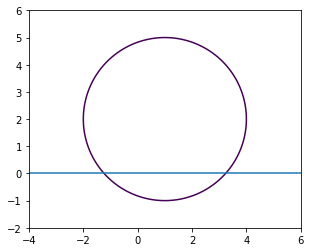

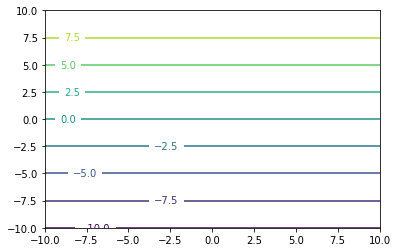

In [3]:
x = np.linspace(-4,6,100)
y = np.linspace(-2,6,100)
X,Y = np.meshgrid(x,y)
c1 = -(X-1)**2 - (Y-2)**2 + 9
c2 = X
plt.contour(X,Y,c1, [0])
plt.gca().set_aspect('equal')
plt.plot(x,[0]*len(x))



x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
Z = np.zeros((len(x), len(y)))
for i, y_value in enumerate(y):
    for j, x_value in enumerate(x):
        Z[i,j] = y_value
        X,Y = np.meshgrid(x,y)
fig, ax = plt.subplots()
CS = plt.contour(X,Y,Z)
plt.clabel(CS, inline = 1, fontsize = 10)











        
        
def func(x):
    return x[1]

def cons1(x):
    return -(x[0]-1)**2 - (x[1]-2)**2 + 9

def cons2(x):
    return -x[1]
x0 = np.array([1,0])
print('Initial guess: ', func(x0))
cons = [{'type': 'ineq', 'fun': cons1},
        {'type': 'ineq', 'fun': cons2}]
solution = scipy.optimize.minimize(func, x0 ,method='SLSQP', constraints = cons)
x1 = solution.x
print('Solution: ', x1)
print('Final objective: ', func(x1))

In [4]:
#CAS 1
n = 4
alpha = np.zeros(n)
for i in range(n):
    alpha[i] = random.uniform(0,0.25)
print(alpha)
def func(x):
    n = 4
    ret = 0
    for i in range(n):
        ret -= np.log(alpha[i]+x[i])
    return ret

def cons1(x):
    n = 4
    ones = np.ones(n)
    return np.dot(ones.T, x)-1

def cons2(x):
    return x

x0 = np.array([1,2,1,1])

cons = [{'type': 'eq', 'fun': cons1},
       {'type': 'ineq', 'fun': cons2}]

scipy.optimize.minimize(func, x0 ,method='SLSQP', constraints = cons)

[0.07046568 0.16463407 0.21603588 0.20359164]


     fun: 3.5306327131737043
     jac: array([-2.41640508, -2.41761488, -2.41779271, -2.41745478])
 message: 'Optimization terminated successfully'
    nfev: 43
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.34337222, 0.24899673, 0.1975645 , 0.21006655])

In [5]:
#CAS 2
n = 4
alpha = np.array([0.15, 0.15, 0.15, 0.15])
def func(x):
    n = 4
    ret = 0
    for i in range(n):
        ret += np.log(alpha[i]+x[i])
    return -ret

def cons1(x):
    n = 4
    ones = np.ones(n)
    return np.dot(ones.T, x)-1

def cons2(x):
    return x

x0 = np.array([1,2,1,1])

cons = [{'type': 'eq', 'fun': cons1},
       {'type': 'ineq', 'fun': cons2}]


scipy.optimize.minimize(func, x0 ,method='SLSQP', constraints = cons)

     fun: 3.6651629641111696
     jac: array([-2.50032407, -2.49953982, -2.50032458, -2.4998115 ])
 message: 'Optimization terminated successfully'
    nfev: 40
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.24994815, 0.25007363, 0.24994807, 0.25003015])

In [11]:
n = 2

def func(x):
    ret = 0
    for i in range(n):
        ret += x[i]*np.log(x[i])
    return ret

def cons1(x):
    ones = np.ones(n)
    return np.dot(ones.T, x)-1

def cons2(x):
    A = np.matrix([[2,0],[0,3]])
    b = np.array([7,1])
    ret = np.array((-np.dot(A,x) + b))
    return ret[0]

cons = [{'type': 'eq', 'fun': cons1},
       {'type': 'ineq', 'fun': cons2}]

x0 = np.array([0.1,0.9])

scipy.optimize.minimize(func, x0 ,method='SLSQP', constraints = cons)

<ipython-input-11-8a241bd12413>:6: RuntimeWarning: invalid value encountered in log
  ret += x[i]*np.log(x[i])


     fun: -0.6365141682948129
     jac: array([ 0.5945349 , -0.09861227])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([0.66666667, 0.33333333])